# Introduction

* Hello, my name is Shorter
* This is a project attempting to construct a ML model to predict unemployment

## Project Objective 
* Analyze data from U.S. Census Bureau's August 2022 Current Population Surve
* To predict unemployment status of respondents to the survey utilizing ML techniques based around classification

## Executive Summary


>* Analysis of the data showed that unemployment rates are fairly small across most population groups
>* Statistical testing confirmed the results across nearly all features
>* The small percentage of the population that is unemployed actually made it more difficult to correctly model
>* Accuracy scores for the models were high, but true negative rates were extremely low for models that scored best in that area

# Import Section

In [1]:
import pandas as pd
import model
import wrangle

from importlib import reload
reload(model)

import warnings
warnings.filterwarnings("ignore")

# Wrangle (Acquire and Prep)
> * Largest and most time intensive part of wrangle was deciding which columns to drop. 
> - Deviated heavily from initial plan to **only** feature resume-like categories. Sub-optimal decision.

### Nulls/Missing Values
> * Dropped any records that have 'NaN' for target variable, indicates incomplete survey/data.
> - Same rationale used to justify dropping most observations that had a '-1' value as that indicated the repsondent did not an apporiate repsonse for the area of the survey
> * For some others such as `usual_hours_worked` information from multiple columns was used to infer proper disposition
> - Example: Individuals that report variable work hours were assigned population mean hours work for above/or below 35 hours. 
> * Further work on the project will require more research of how the survey is conducted and the data entered. 
---
### Feature Engineering 
> * Decided against engineering features due to poor model performance with accurately predicting employment disposition. No point increasing complexity
---   
### Flattening
> * Had to make decisions in order to remove optionality from certain categorical columns when preparing the data
> - Example: `race` orginally had over 20 different categories and was ~flattened~ down to 7 
> * Decisons here driven mostly by desire to create larger cohorts within  features because the unemployment is already such as small amount


In [2]:
#calling prepare/acquire functions from module to acquire and split data subsets
df = wrangle.prep_aug()
train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle.split_scale(df, 'y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50556 entries, 1 to 127917
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_type                50556 non-null  object 
 1   family_income               50556 non-null  object 
 2   household_num               50556 non-null  int64  
 3   household_type              50556 non-null  object 
 4   own_bus_or_farm             50556 non-null  int64  
 5   country_region              50556 non-null  object 
 6   state                       50556 non-null  object 
 7   metropolitan                50556 non-null  object 
 8   metro_area_size             50556 non-null  object 
 9   age                         50556 non-null  float64
 10  is_male                     50556 non-null  int64  
 11  marital_status              50556 non-null  object 
 12  veteran                     50556 non-null  int64  
 13  education                   50

## Exploration Questions 
* Includes visualizations and statistical tests
* Primarily focused on items that appear on the typical resume or job application

### Spotlight - Industry 
* **Question:** Which industry shows the largest population proportion change between employed and unemployed?  
* **Answer:** Leisure and Hospitality. This industry also has the highest unemployment rate at 6%

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between industry of typical employment and employment status   
>* ${H_a}$: There is a relationship between industry of typical employment and employment status  
>* ${\alpha}$: .05  
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


chi^2: 157.9437
p: 0.0000
degrees of freedom: 13
Reject null hypothesis


<Figure size 1440x432 with 0 Axes>

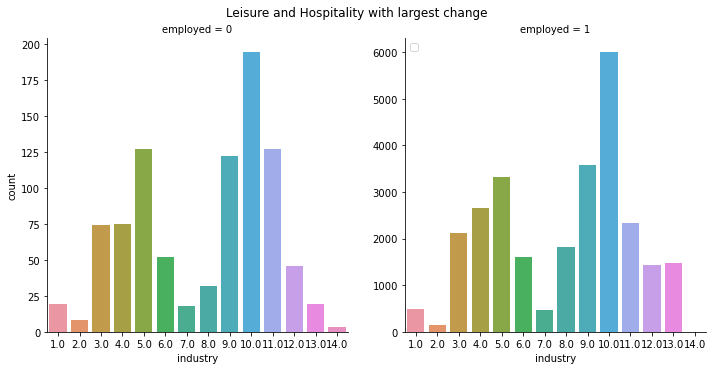

population_proportions                   unemployment_rate
                       employed unemployed change                  
industry                                                           
14.0                        NaN      0.003    NaN              1.00
11.0                      0.085      0.139 -0.054              0.05
2.0                       0.005      0.009 -0.003              0.05
1.0                       0.018      0.021 -0.003              0.04
7.0                       0.017      0.020 -0.003              0.04
5.0                       0.121      0.139 -0.017              0.04
3.0                       0.077      0.081 -0.003              0.03
9.0                       0.130      0.133 -0.003              0.03
6.0                       0.058      0.057  0.001              0.03
10.0                      0.219      0.212  0.007              0.03
12.0                      0.052      0.050  0.002              0.03
4.0                       0.097      0.082  0.015              0.03
8.0                       0.067      0.035  0.032              0.02
13.0                      0.054      0.021  0.033              0.01

In [3]:
#calls function to display visuals and results of statistical analysis and testing
model.spotlight_stats(train, 'industry', 'Leisure and Hospitality with largest change')

1	Agriculture, forestry, fishing, and hunting		
	
2	Mining		

3	Construction  	

4	Manufacturing  			

5	Wholesale and retail trade	  

6	Transportation and utilities	 

7	Information	  			

8	Financial activities	  	

9	Professional and business services	  	

10	Educational and health services		

11	Leisure and hospitality	  		

12	Other services		  			

13	Public administration	  		
					
14	Armed Forces  

### Spotlight - Race
* **Question:** Which industry shows the largest population proportion change between employed and unemployed?

* **Answer:** Indivduals identifying as White show the largest population proportion change with a drop of nearly 10% when comparing employed vs unemployed. Those identifying as mixed race other than with white, and Indigenous have the highest unemployed rates at 12% and 7% respectively. 

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between `race` and `employment` status   
>* ${H_a}$: There is a relationship between `race` and `employment` status   
>* ${\alpha}$: .05  
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


chi^2: 62.1129
p: 0.0000
degrees of freedom: 6
Reject null hypothesis


<Figure size 1440x432 with 0 Axes>

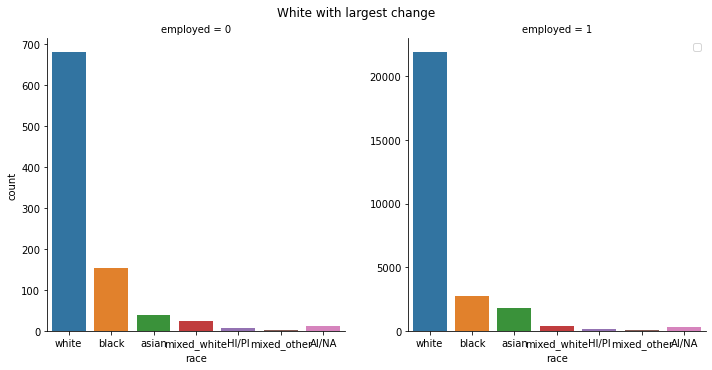

population_proportions                   unemployment_rate
                          employed unemployed change                  
race                                                                  
mixed_white                  0.015      0.026 -0.011              0.05
black                        0.099      0.168 -0.069              0.05
HI/PI                        0.005      0.008 -0.002              0.04
AI/NA                        0.011      0.014 -0.003              0.04
white                        0.799      0.741  0.058              0.03
asian                        0.066      0.041  0.024              0.02
mixed_other                  0.003      0.001  0.002              0.01

In [4]:
#calls function to display visuals and results of statistical analysis and testing
model.spotlight_stats(train, 'race', 'White with largest change')

### Spotlight - Professional Certification
* **Question:** What is the effect of having a professional certification? 
 
* **Answer:** Most indivduals do not have certification, but those that do have a 2% unemployment rate vs 4% for those without.

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between having a `professional_certification` and `employment`  
>* ${H_a}$: There is a relationship between having a `professional_certification` and `employment`    
>* ${\alpha}$: .05
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


chi^2: 40.1235
p: 0.0000
degrees of freedom: 1
Reject null hypothesis


<Figure size 1440x432 with 0 Axes>

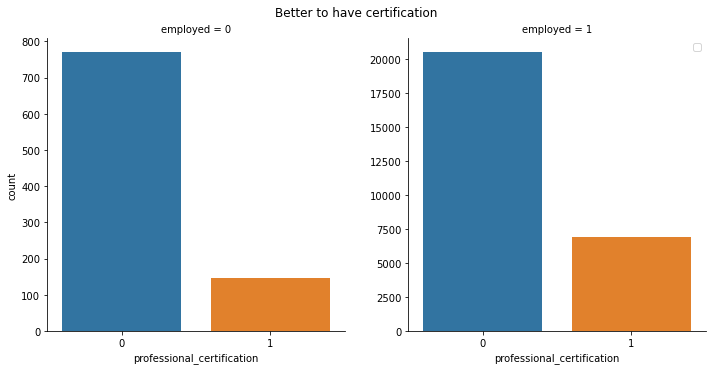

population_proportions                    \
                                         employed unemployed change   
professional_certification                                            
0                                           0.748      0.841 -0.093   
1                                           0.252      0.159  0.093   

                           unemployment_rate  
                                              
professional_certification                    
0                                       0.04  
1                                       0.02

In [5]:
#calls function to display visuals and results of statistical analysis and testing
model.spotlight_stats(train, 'professional_certification', 'Better to have certification')

## Exploration Summary
* Overall the conventional wisdom surrounding job prospects held true.

* It benefits an indvidual to acquire advanced dregrees and certifications
* Having a job or career in an industry that leans more towards being a profession helps
* With more time I want to dive into cross examinations of factors to see how they interact, but I'm doubtful that would help more than simply satisfying my curiousity. 

# Modeling
* Models process was initially guided by Accuracy, but over time realized that approach was not actually doing a good job of capturing the obervations that were actually unemployed

* After the 2 round of mass model testing adjust to filtering for models that had higher Sensitivity scores to more effectively capture the target. Prefer a model that correctly identifies a person that is unemployed than one that misses the vast majority

* The models appeared to have an inverse relationship in this regard with many of the models having a Sensitivity rate above 30% also having an Accuracy below 70%

* With the employed vs unemployed numbers being around 96% vs 4% this led me to feel the overall project is going to need **much** more work to have any greater value

## Feature Groups for Modeling
* Grouped by subject matter into four clumps in leiu of clustering

* Feature Set 1: `industry`, `occupation`, `country_region`, `metro_area_size` , `professional_certification`, `own_bus_or_farm`,`education`  
    - Chosen to highlight the business oriented concerns around employement
    ---
* Feature Set 2: `household_num`, `children_in_household`, `education`, `enrolled_in_school`, `family_income`, `marital_status`
    - Highlights family and environment characteristics
    ---
* Feature Set 3: `age`, `is_male`, `veteran`, `hispanic_non`, `race`, `birth_country`, `mother_birth_country`, `father_birth_country`, `citizenship`, `education` 
    - Highlights personal characteristics 
    ---
* Feature Set 4: `age`, `industry`, `occupation`,`professional_certification`,`education`,`marital_status`,`is_male`,`citizenship`
    - Highlights areas that may appear on the typical resume or job applicaton

## Top Models

## Validate
* Only 3 models fit final criteria from train set performance
* Models needed Sensitivity score of at least 30%
* Model:
* Model:
    - Name: LR_56
    - Type: Logistic Regression
    - C: `.5`
    - Solver: `newton-cg`
    - Weight: `balanced`    
    - Features: `household_num`, `children_in_household`, `education`, `enrolled_in_school`, `family_income`, `marital_status`
* Model:
    - Name: LR_36
    - Type: Logistic Regression
    - C: `.1`
    - Solver: `lbfgs`
    - Weight: `balanced`
    - Features: `household_num`, `children_in_household`, `education`, `enrolled_in_school`, `family_income`, `marital_status`

## Test
* Best Performing Model:
    - Name: LR_16
    - Type: Logistic Regression
    - C: `.1`
    - Solver: `lbfgs`
    - Weight: `balanced`
    - Features: `household_num`, `children_in_household`, `education`, `enrolled_in_school`, `family_income`, `marital_status`

In [6]:
#import features sets for use with modeling
feature_bank = model.get_features()

In [7]:
#Performs modeling, testing, and scoring.
#outputs results of final model test
test_metrics, top_3 = model.for_final_report(train_scaled, validate_scaled, test_scaled, feature_bank)

In [8]:
top_3

,Model,Accuracy(Score),Sensitivity,Type,Features Used,Parameters
17,LR_16,0.6842,0.6199,Logistic Regression,"['household_num', 'children_in_household', 'ed...","C: 0.1, Solver: newton-cg, Class Weight: balanced"
19,LR_36,0.6913,0.6173,Logistic Regression,"['household_num', 'children_in_household', 'ed...","C: 0.5, Solver: newton-cg, Class Weight: balanced"
21,LR_56,0.6913,0.6148,Logistic Regression,"['household_num', 'children_in_household', 'ed...","C: 1, Solver: newton-cg, Class Weight: balanced"


In [9]:
test_metrics

,LR_16
Accuracy/Score,0.6897
True Positives,6792.0000
False Positives,145.0000
True Negatives,182.0000
False Negatives,2993.0000
TPR/Recall,0.6941
False Positive Rate,0.4434
True Negative Rate,0.5566
False Negative Rate,0.3059
Precision,0.9791


# Conclusion
## Summary of Key Findings
>* As a portion the population unemployed individuals are small.
>- Overwhelming majorities of people are either employed or not in the labor force due to disability, retirement, or other reasons. 
>* Testing confirms that being educated, married, and with a professional certification are good ways to stay away from unemployement. 
>- From a modeling/ML perspective this project was not one where the Accuracy/Scoring played a big part. The best models in that area underperformed when it came to correctly identifying unemployed persons.
>* Shifted focus to generating models with better Sensitivy/True Negative Rate performance
---
## Suggestions and Next Steps
>* Do not suggest using these models for any sort of analysis or research
>- Subpar performance when attempting to correctly identify employment status
>* Will work to expand the data set, and possibly port project over to the wider 2020 census data
>- Also would like to expand skillset to work with other ML strategies for classification
>* Future development of this project will focus on really driving up the True Negative Rates of the model metrics so I can better capture employment disposition
